# Airline Passanger Satisfaction Analysis
**In this analysis, we are going to use an airline passenger satisfaction survey as our dataset.**
**The objective is to figure out the factors which are highly correlated to a satisfied passanger?**
**We will also try to predict passanger satisfaction.**

At first, we import all the packages and modules necessary to run the analysis

In [1]:
#import the necessary modules
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib as plt
import seaborn as sns
import random
from sklearn.metrics import f1_score,roc_curve,roc_auc_score
import time
from sklearn.linear_model import LogisticRegression
import warnings
warnings.simplefilter('ignore')

In this case, we are already provided with the training data and test data in seperate files. Here, we read the training data to start the analysis. Following this we conduct data profiling steps *(such as null checks)* 

In [2]:
source_df = pd.read_csv('airline_passenger_satisfaction_train.csv')
source_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
#get the record count for the training data
print(len(source_df))

103904


In [4]:
#check the number of null records in the training data
source_df.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In this case, the column "Arrival Delay in Minutes" has null values. We first, check if the null values are expected. 
Querying the data reveals that the minimum value for the field is 0, thus the null values are indeed missing records *(i.e. they do not actually indicate no arrival delay)*
___
Taking this into account, we remove such records from our training set

In [5]:
#Check miminum value for the attribute 'Arrival Delay in Minutes'
source_df['Arrival Delay in Minutes'].min()

0.0

In [6]:
#clean the data by removing the null records
source_df = source_df.dropna(subset=['Arrival Delay in Minutes'])

The columns 'Unnamed: 0','id' are system fields and do not have any business value. We thus remove the two fields from our training dataset.

In [7]:
# drop the columns 'Unnamed: 0' and 'id'
source_df = source_df.drop(columns=['Unnamed: 0','id'])

***
Next, we plot the values of the present columns to observe the distribution of the data

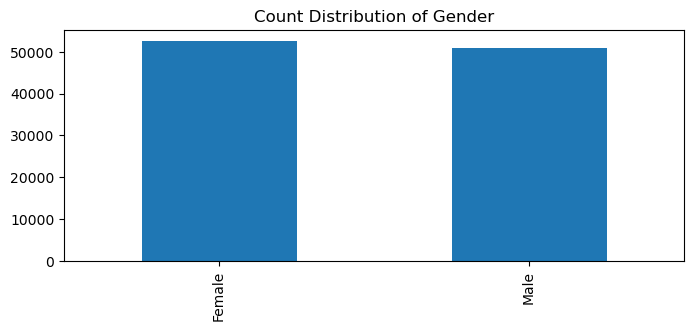

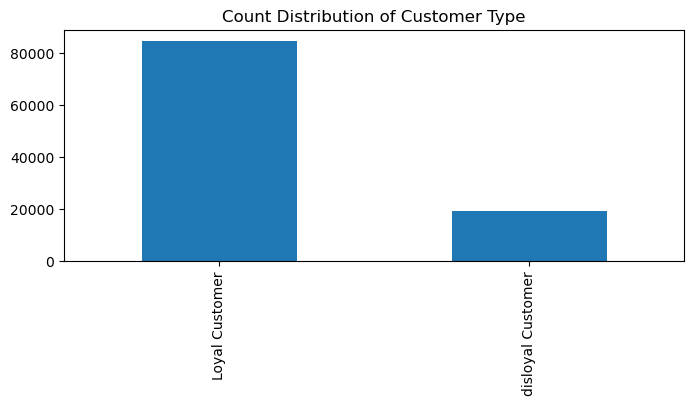

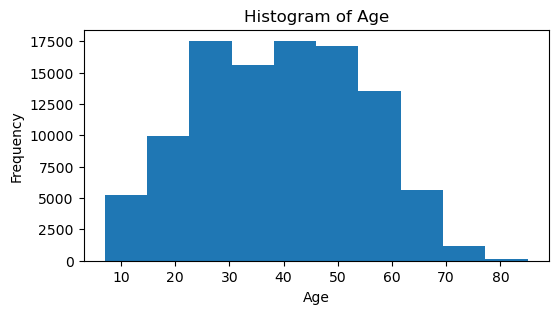

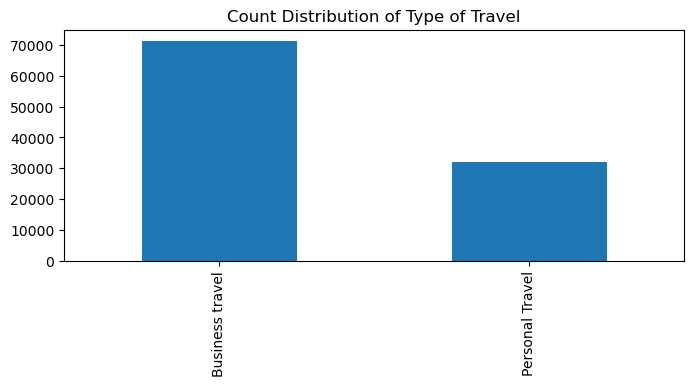

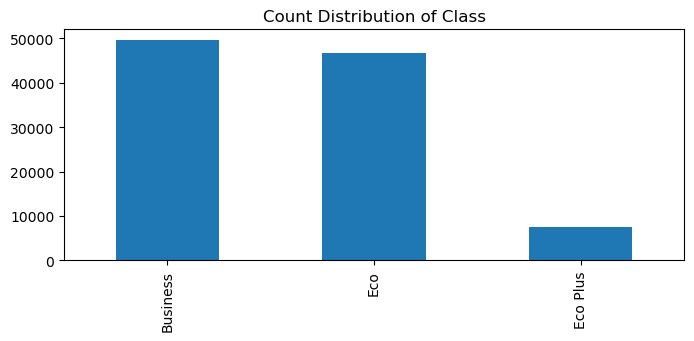

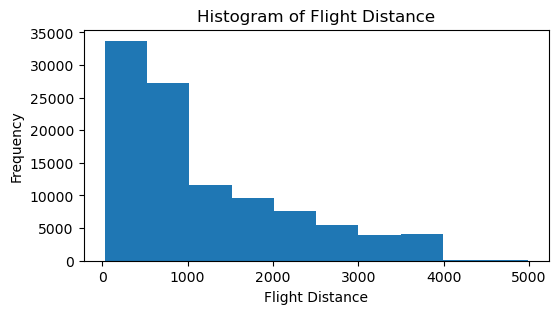

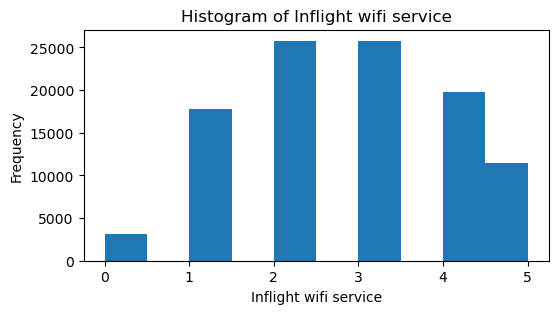

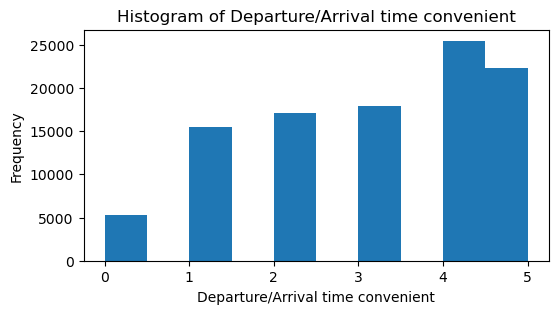

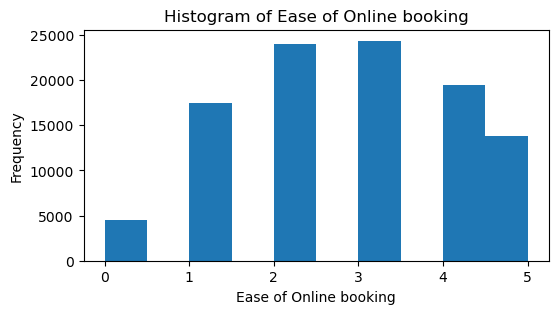

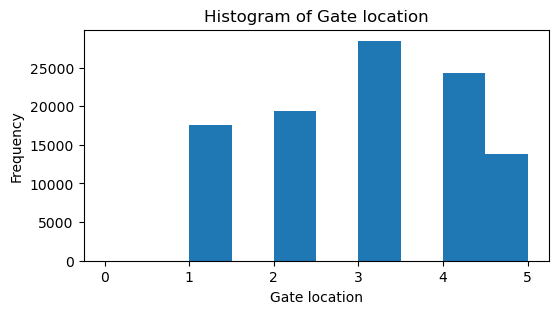

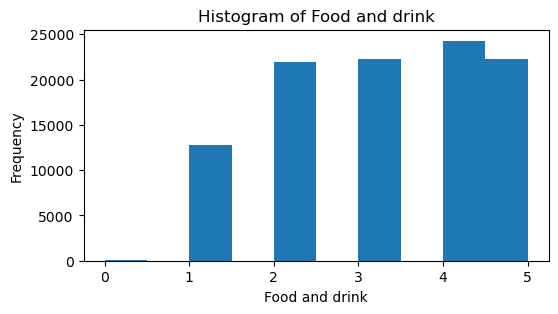

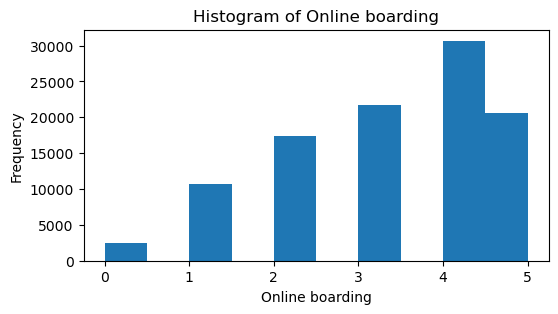

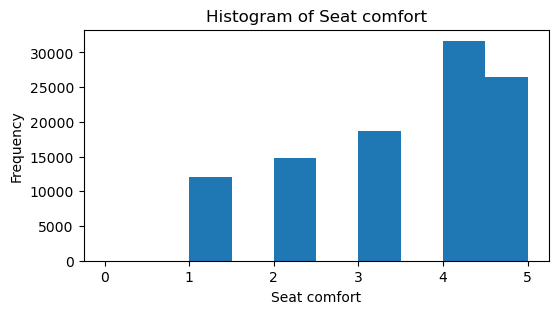

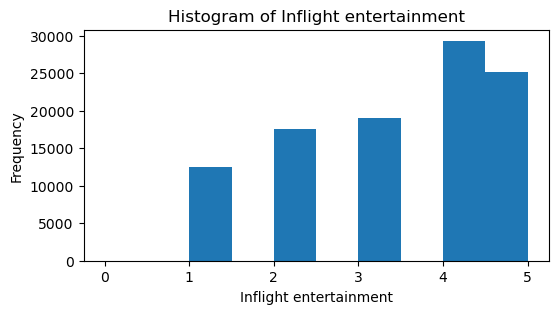

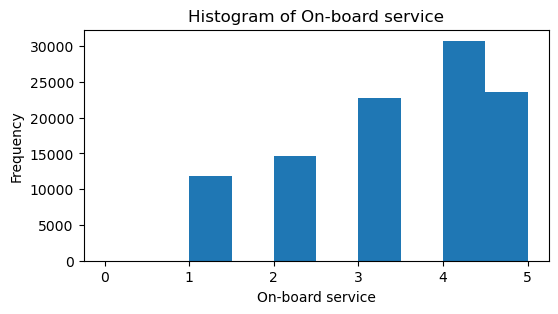

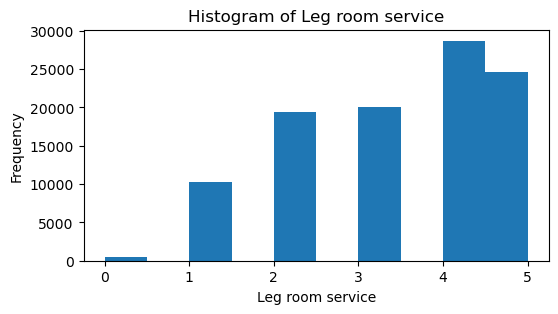

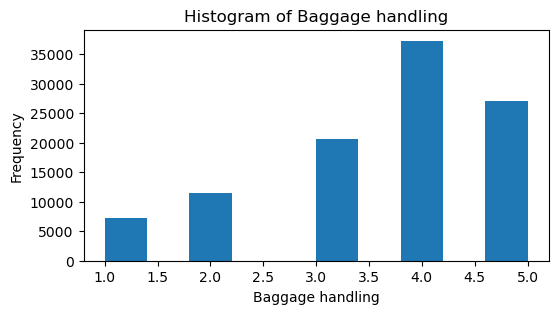

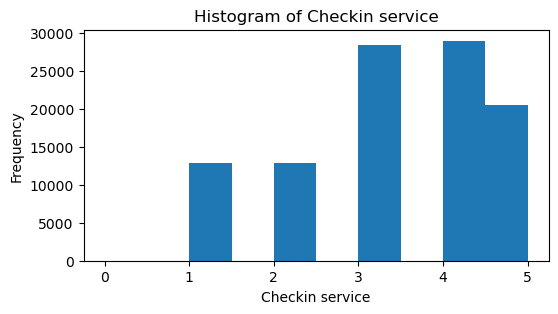

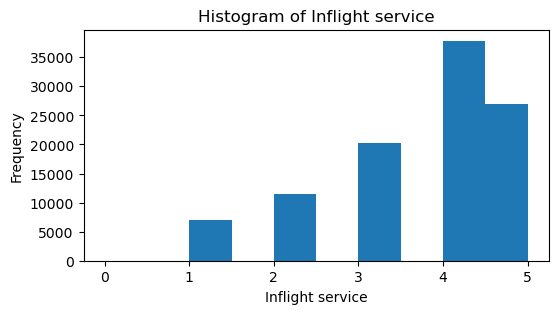

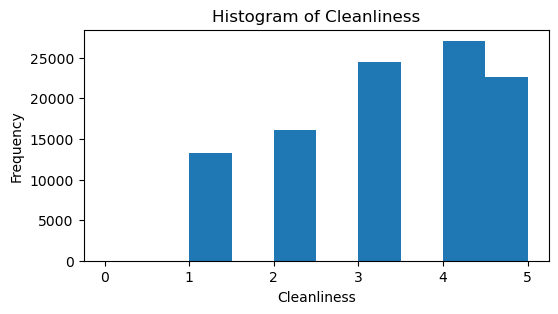

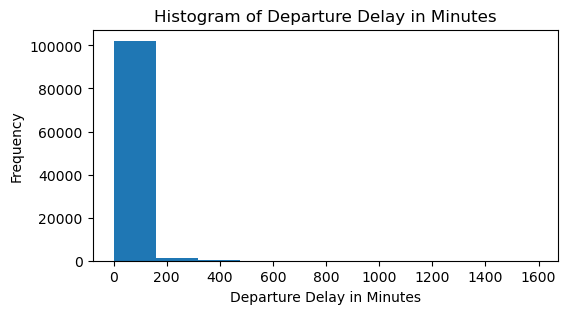

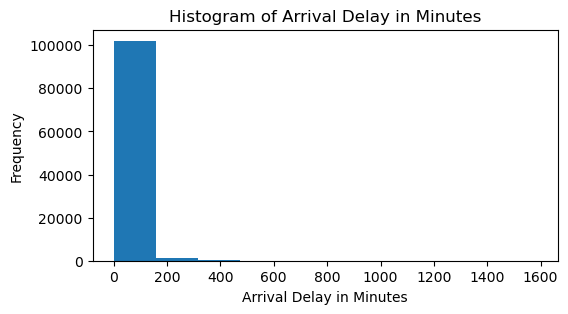

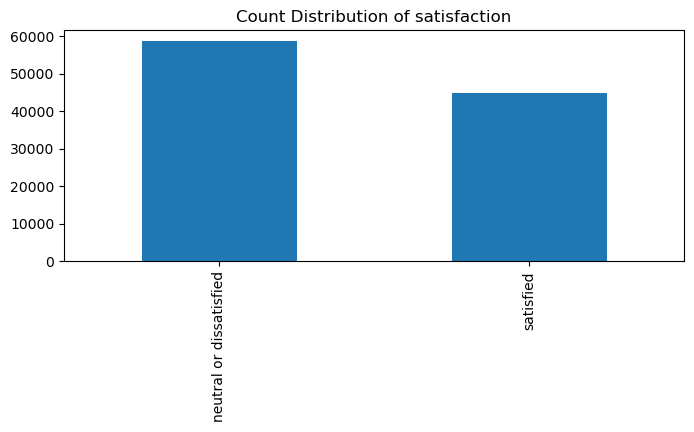

In [8]:
#plot the histograms and count distribution for all the present attributes
for column_name, column_data_type in source_df.dtypes.items():
    if column_data_type=='object' :
        plt.pyplot.figure(figsize=(6, 3))
        source_df[column_name].value_counts()[:20].plot(kind='bar',
                                    figsize=(8,3),
                                    title="Count Distribution of "+column_name)
    else:
        plt.pyplot.figure(figsize=(6, 3))
        plt.pyplot.hist(source_df[column_name])
        plt.pyplot.xlabel(column_name)
        plt.pyplot.ylabel('Frequency')
        plt.pyplot.title("Histogram of "+column_name)

Initial analysis reveals that more than 50 % of the customers are dissatisfied. 
This is despite the indication that majority of the customers are loyal. Alongside this, the male and female customers are similarly distributed. The mediam age of customers is around 40 yrs. These are some of the intial observations from the data.
***
Following this, we try to check the ditribution of the predictor values vis a vis the output values.

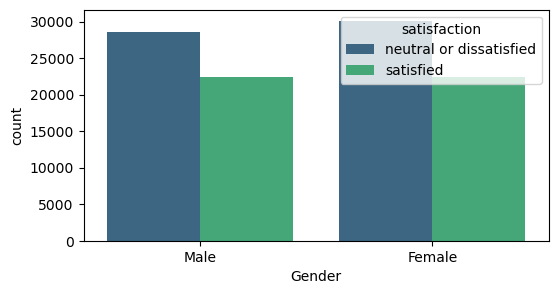

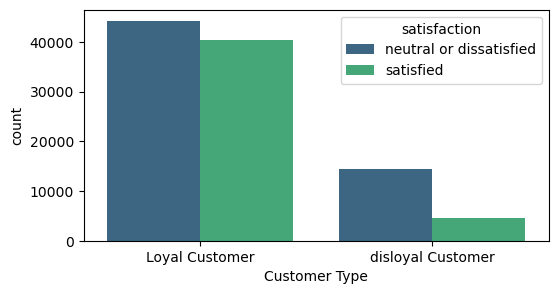

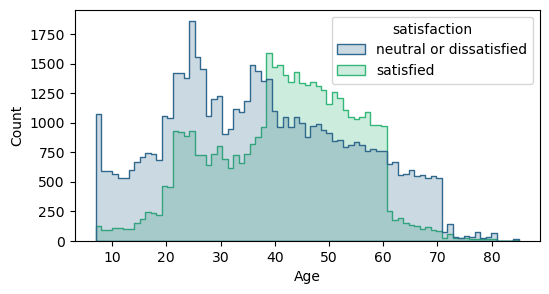

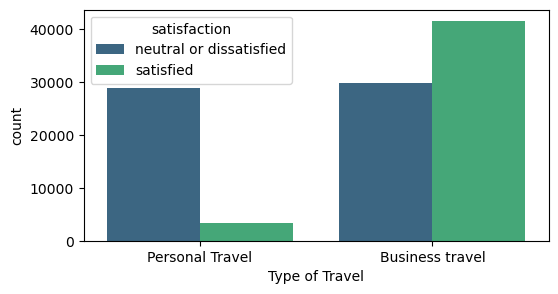

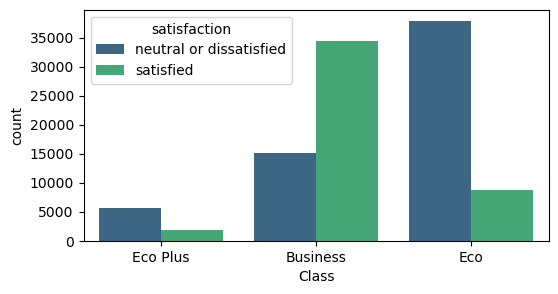

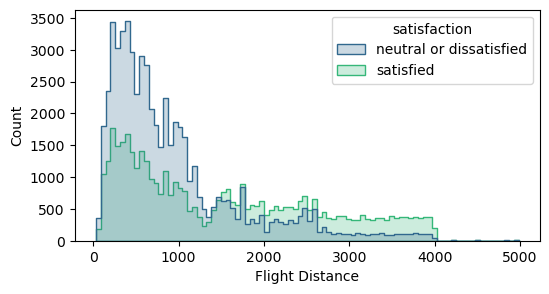

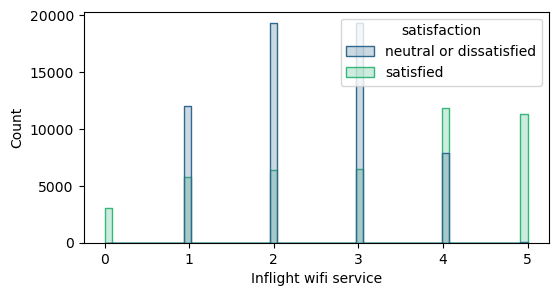

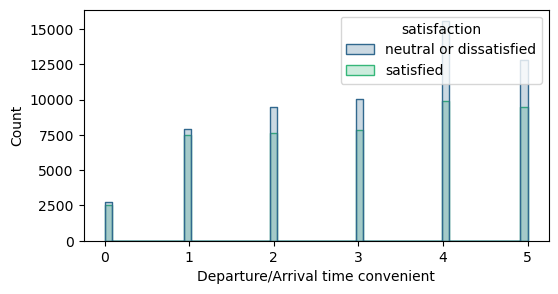

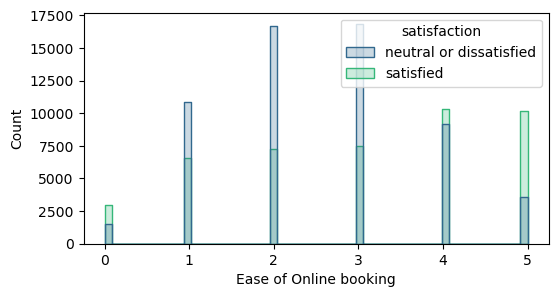

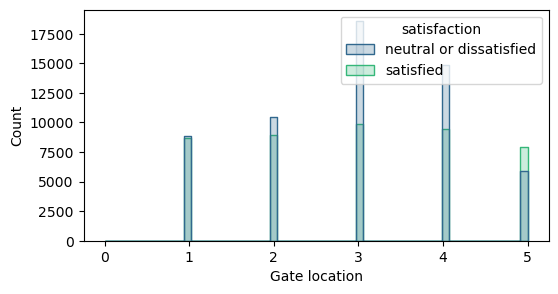

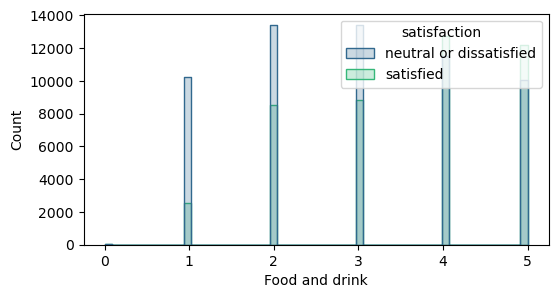

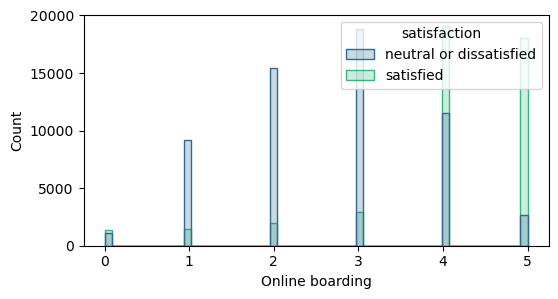

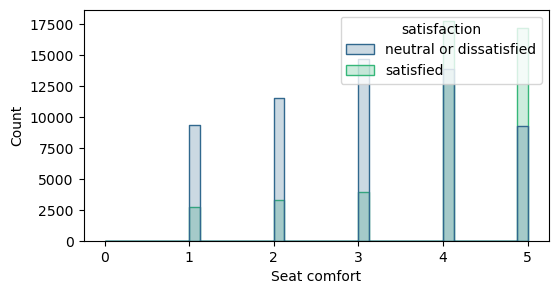

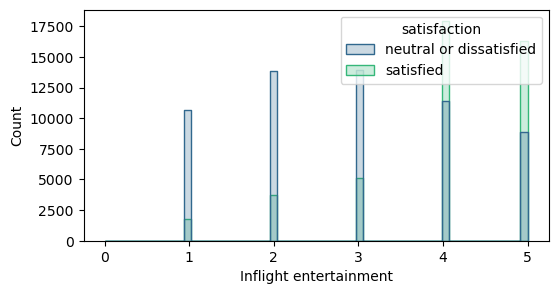

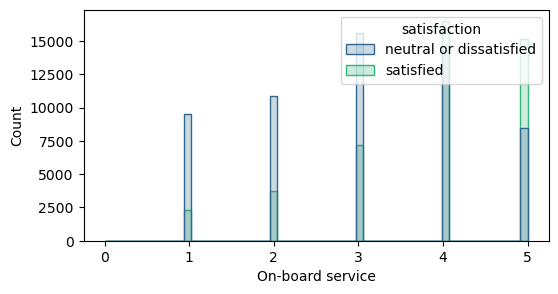

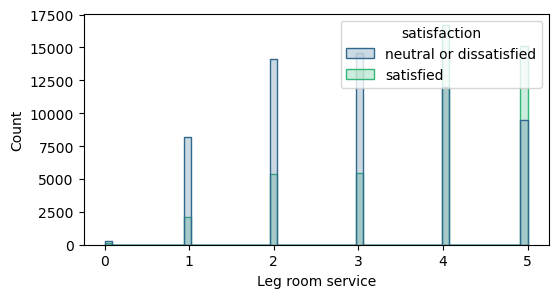

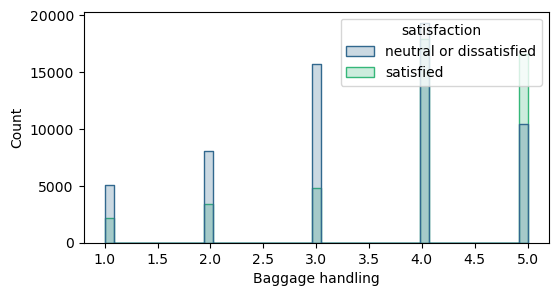

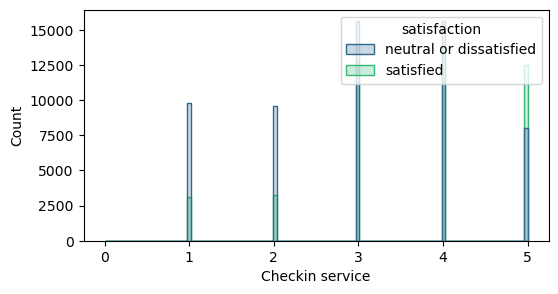

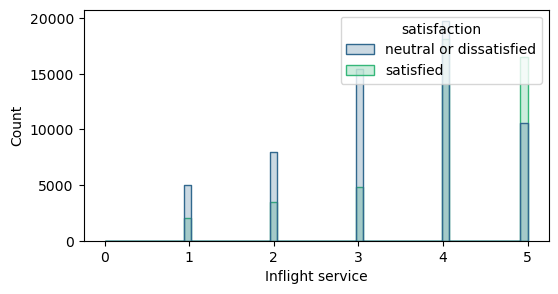

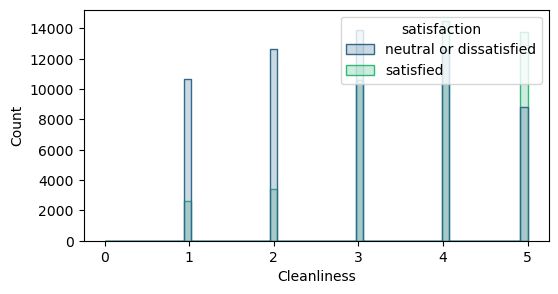

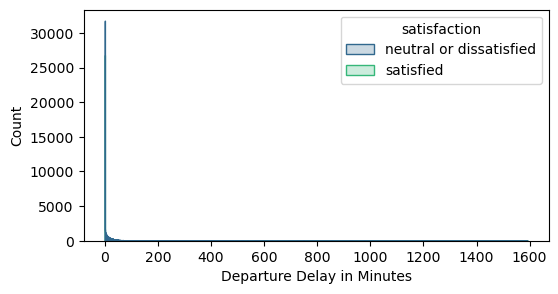

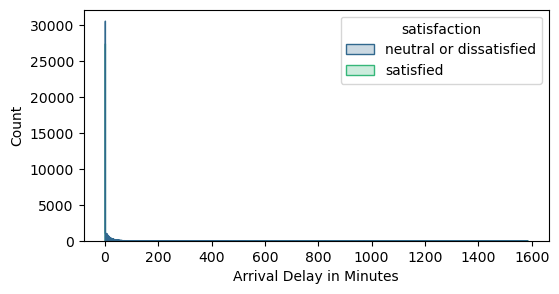

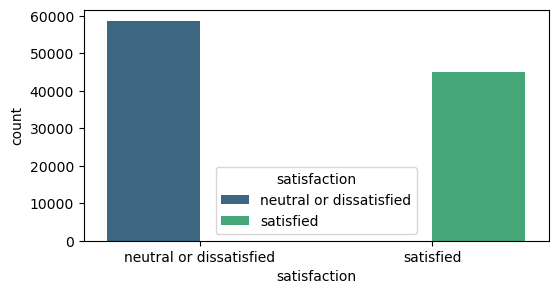

In [10]:
#plot the distribution of the fields with respect to the satisfaction level of the customer
for column_name, column_data_type in source_df.dtypes.items():
    if column_data_type=='object' :
        plt.pyplot.figure(figsize=(6, 3))
        sns.countplot(data=source_df,x=column_name,hue=source_df.columns[-1],palette='viridis')
        plt.pyplot.show()
    else: 
        plt.pyplot.figure(figsize=(6, 3))
        sns.histplot(data=source_df,x=column_name,hue=source_df.columns[-1],element='step',palette='viridis')
        plt.pyplot.show()

The data shows that Personal Travel customer is more likely to be "Neutral or dissatisified". At the same time, Economy passangers are more likely to be "Neutral or dissatisified". We see that the mean age for dissatisfied customers is 25 while the mean age for satisifed customers is 50. We see Online Booking is likely to influence the satisfaction level of the cusotmer. However, the departure/arrival convenience does not seem to influence the customer satisfaction greatly.
***
We now try to check the correlation of the predictor fields with each other

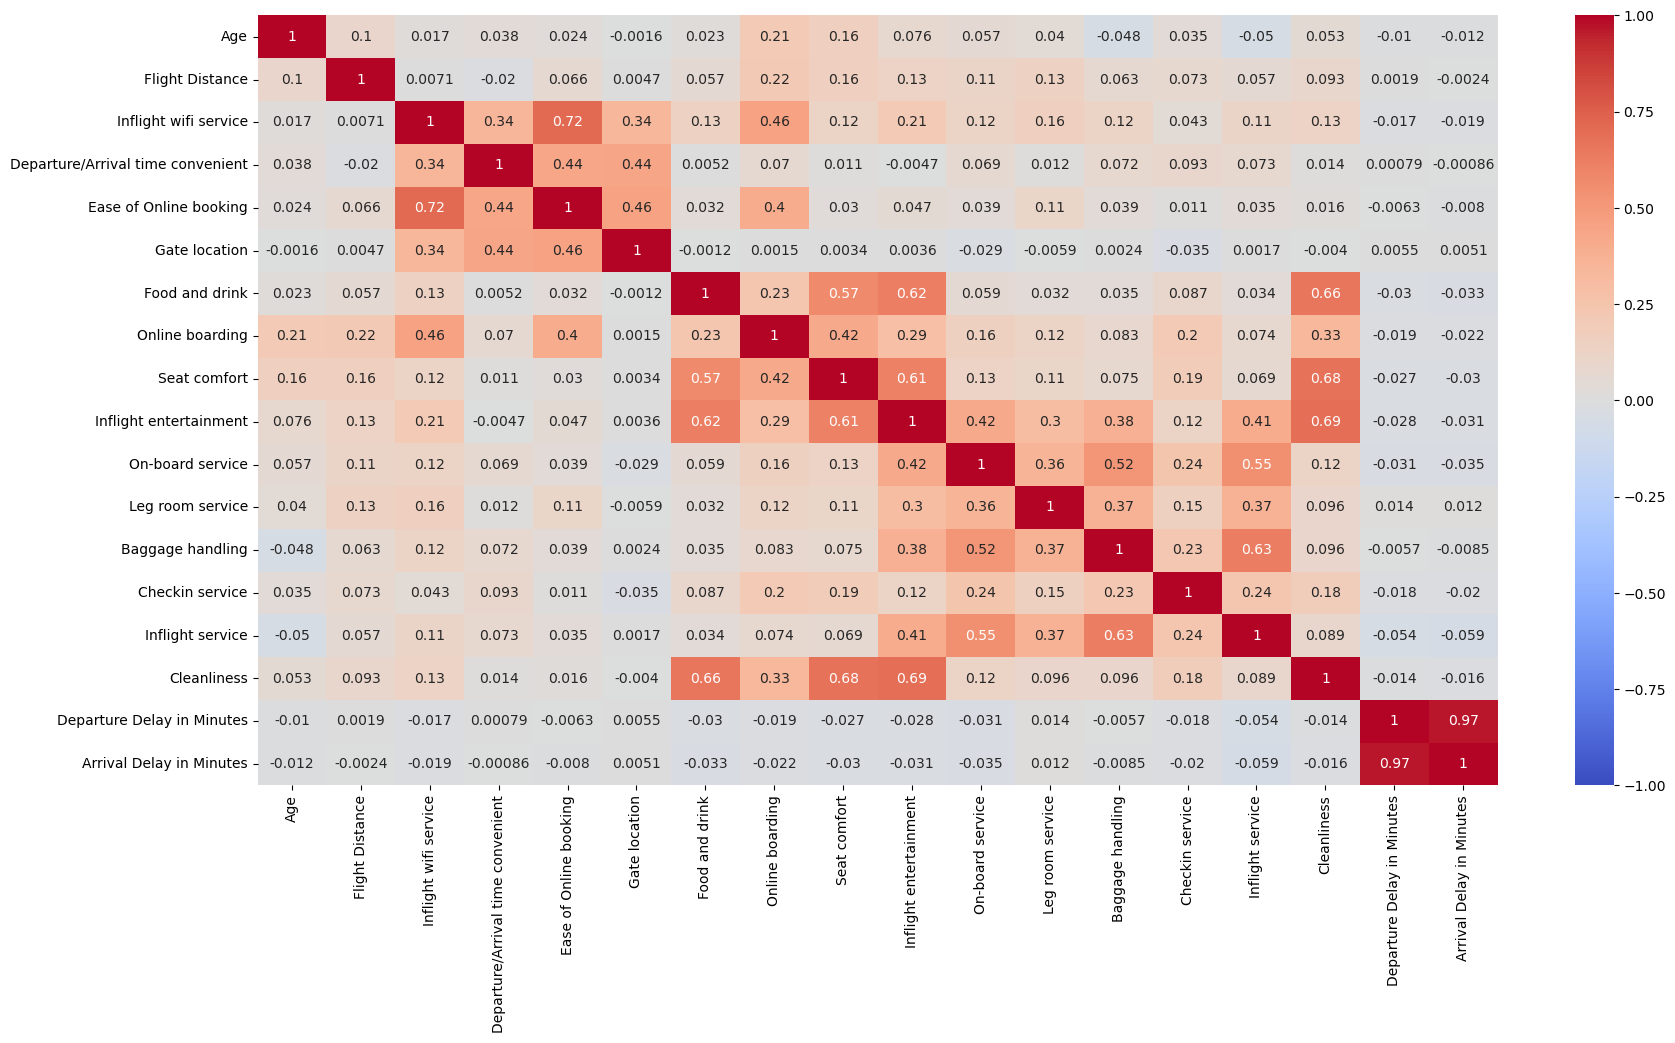

In [9]:
#plot the correlation matrix of the fields as a heat map
plt.pyplot.figure(figsize=(20, 10))
sns.heatmap(source_df.corr(), vmax=1, vmin=-1,  cmap="coolwarm", annot=True)
plt.pyplot.show()

From the correlation martrix, we see the fields 'Arrival Delay in Minutes' and 'Departure Delay in Minutes' are highly correlated. Thus, we remove one of the fields to eliminate interaction.

In [10]:
#remove the column 'Arrival Delay in Minutes' from the training dataset
source_df = source_df.drop(columns=['Arrival Delay in Minutes'])
source_df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,satisfied


Now, we have removed the unnecessary attributes and the missing data from the training dataset.
We will now prepare the test data to go through the same steps, to make the two datasets homogeneous. Following this, we will prepare the training and testing data for the machine learning models. *(This also included scaling the data)*

In [11]:
#Read the test data and remove the same columns 'Unnamed: 0','id','Arrival Delay in Minutes', that we removed from the 
test_df = pd.read_csv("airline_passenger_satisfaction_test.csv")
test_df=test_df.drop(columns=['Unnamed: 0','id','Arrival Delay in Minutes'])
test_df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,3,5,5,5,5,2,5,5,50,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,5,4,4,4,4,3,4,5,0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,2,4,1,3,2,2,2,0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,4,1,1,1,1,3,1,4,0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,2,4,2,4,0,satisfied


In [12]:
#prepare the training and testing dataset for the ML models
ytrain=source_df['satisfaction'] #training set expected output
ytest=test_df['satisfaction'] #training set expected output
train_df=source_df.drop(columns=['satisfaction']) #training set input data
test_df=test_df.drop(columns=['satisfaction']) #training set input data


train_df=pd.get_dummies(train_df,drop_first=True) #encoding categorical variables in the trianing set
test_df =pd.get_dummies(test_df,drop_first=True) #encoding categorical variables in the testing set
ytrain=pd.get_dummies(ytrain,drop_first=True) #encoding categorical variables in the trianing expected output
ytest=pd.get_dummies(ytest,drop_first=True) #encoding categorical variables in the trianing expected output
xnames=train_df.columns
display(train_df.head())
display(test_df.head())

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,...,4,4,5,5,25,1,0,1,0,1
1,25,235,3,2,3,3,1,3,1,1,...,3,1,4,1,1,1,1,0,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,4,4,4,5,0,0,0,0,0,0
3,25,562,2,5,5,5,2,2,2,2,...,3,1,4,2,11,0,0,0,0,0
4,61,214,3,3,3,3,4,5,5,3,...,4,3,3,3,0,1,0,0,0,0


,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,52,160,5,4,3,4,3,4,3,5,...,5,2,5,5,50,0,0,0,1,0
1,36,2863,1,1,3,1,5,4,5,4,...,4,3,4,5,0,0,0,0,0,0
2,20,192,2,0,2,4,2,2,2,2,...,3,2,2,2,0,1,1,0,1,0
3,44,3377,0,0,0,2,3,4,4,1,...,1,3,1,4,0,1,0,0,0,0
4,49,1182,2,3,4,3,4,1,2,2,...,2,4,2,4,0,0,0,0,1,0


In [13]:
#scale the data using z-score normalization
train_df = preprocessing.StandardScaler().fit_transform(train_df)
test_df = preprocessing.StandardScaler().fit_transform(test_df)

The data preparation is now complete. 
***
We will now try to apply different machine learning algorithms on the data to get a good fit for the same. As the output is categorical, we tried using ***Logistic Regression***

              precision    recall  f1-score   support

           0       0.87      0.90      0.89     14573
           1       0.87      0.83      0.85     11403

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976



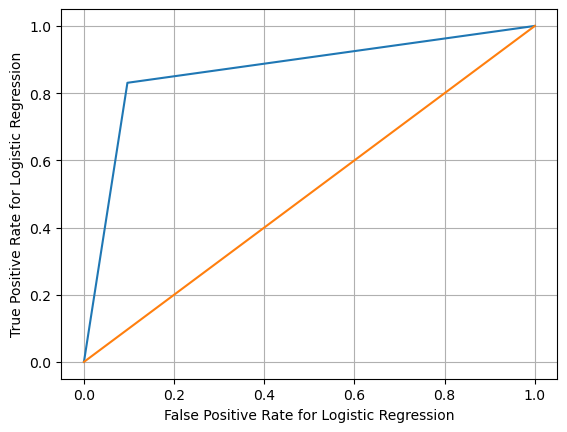



 The AUC for Logistic Regression is : 0.8671675617452129


 The time to run the Logistic Regression model is 1.0410606861114502  seconds


In [14]:
#Logistic Regression

t_start=time.time()
logreg_model = LogisticRegression(random_state=123)
logreg_model.fit(train_df, ytrain)
y_pred = logreg_model.predict(test_df)
print(classification_report(ytest, y_pred))

fpr, tpr, _ = roc_curve(ytest,  y_pred)
auc = roc_auc_score(ytest, y_pred)
plt.pyplot.figure()
#create ROC curve
plt.pyplot.plot(fpr,tpr)
line = np.linspace(0,1,100)
plt.pyplot.plot(line,line)
plt.pyplot.ylabel('True Positive Rate for Logistic Regression')
plt.pyplot.xlabel('False Positive Rate for Logistic Regression')
plt.pyplot.grid()
plt.pyplot.show() 

print("\n\n The AUC for Logistic Regression is :", auc)
print("\n\n The time to run the Logistic Regression model is", time.time()-t_start, " seconds")

Following this, we tried using the ***KNN algorithm***
***
Here, at first, we used ***Cross Validation*** to find out the optimum parameters for the model. Following this, we used the obtained parameter values to get the predicted model.

In [112]:
#KNN with Cross Validation to get the optimum model arguments
random.seed(123)
params = {
    "n_neighbors" : [4,8,12,16,20],
    "weights" : ['uniform','distance'],
}
clf = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params, scoring='f1',verbose=3)
clf.fit(train_df,ytrain)
clf.best_params_
#{'n_neighbors': 8, 'weights': 'distance'}

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.899 total time=   6.6s
[CV 2/5] END ....n_neighbors=4, weights=uniform;, score=0.900 total time=   7.2s
[CV 3/5] END ....n_neighbors=4, weights=uniform;, score=0.901 total time=   6.7s
[CV 4/5] END ....n_neighbors=4, weights=uniform;, score=0.901 total time=   5.8s
[CV 5/5] END ....n_neighbors=4, weights=uniform;, score=0.907 total time=   7.0s
[CV 1/5] END ...n_neighbors=4, weights=distance;, score=0.910 total time=   4.8s
[CV 2/5] END ...n_neighbors=4, weights=distance;, score=0.912 total time=   4.7s
[CV 3/5] END ...n_neighbors=4, weights=distance;, score=0.910 total time=   6.1s
[CV 4/5] END ...n_neighbors=4, weights=distance;, score=0.910 total time=   4.9s
[CV 5/5] END ...n_neighbors=4, weights=distance;, score=0.915 total time=   4.8s
[CV 1/5] END ....n_neighbors=8, weights=uniform;, score=0.905 total time=   7.2s
[CV 2/5] END ....n_neighbors=8, weights=uniform;

{'n_neighbors': 8, 'weights': 'distance'}

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     14573
           1       0.95      0.88      0.92     11403

    accuracy                           0.93     25976
   macro avg       0.93      0.92      0.93     25976
weighted avg       0.93      0.93      0.93     25976



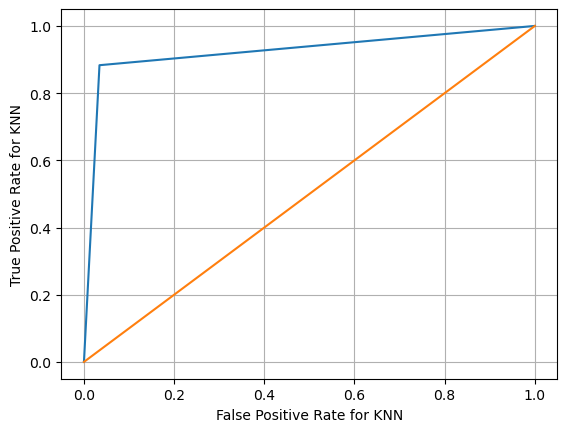



 The AUC for KNN is : 0.9243268364292904


 The time to run the KNN model is 2.570631980895996  seconds


In [19]:
#Run KNN with the obtained paramters to get the predicted model

t_start=time.time()

model = KNeighborsClassifier(n_neighbors=8, weights='distance') #Run the KNN Model with the parameters {'n_neighbors': 8, 'weights': 'distance'}
model.fit(train_df, ytrain)
y_pred = model.predict(test_df)
print(classification_report(ytest, y_pred))

fpr, tpr, _ = roc_curve(ytest,  y_pred)
auc = roc_auc_score(ytest, y_pred)
plt.pyplot.figure()
#create ROC curve
plt.pyplot.plot(fpr,tpr)
line = np.linspace(0,1,100)
plt.pyplot.plot(line,line)
plt.pyplot.ylabel('True Positive Rate for KNN')
plt.pyplot.xlabel('False Positive Rate for KNN')
plt.pyplot.grid()
plt.pyplot.show() 

print("\n\n The AUC for KNN is :", auc)
print("\n\n The time to run the KNN model is", time.time()-t_start, " seconds")

Following this, we tried to use ***Decision Tree*** with ***Cross Validation***

In [21]:
#Decision Tree with Cross Validation to get the optimum model arguments
random.seed(123)
params = {
    'max_depth' : [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
}
grid2 = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params, scoring='f1',verbose=3)
grid2.fit(train_df,ytrain)
grid2.best_params_
#max_depth=15

Fitting 5 folds for each of 17 candidates, totalling 85 fits
[CV 1/5] END .......................max_depth=4;, score=0.871 total time=   0.3s
[CV 2/5] END .......................max_depth=4;, score=0.867 total time=   0.4s
[CV 3/5] END .......................max_depth=4;, score=0.861 total time=   0.4s
[CV 4/5] END .......................max_depth=4;, score=0.863 total time=   0.4s
[CV 5/5] END .......................max_depth=4;, score=0.860 total time=   0.5s
[CV 1/5] END .......................max_depth=5;, score=0.888 total time=   0.6s
[CV 2/5] END .......................max_depth=5;, score=0.890 total time=   0.6s
[CV 3/5] END .......................max_depth=5;, score=0.889 total time=   0.5s
[CV 4/5] END .......................max_depth=5;, score=0.892 total time=   0.5s
[CV 5/5] END .......................max_depth=5;, score=0.889 total time=   0.5s
[CV 1/5] END .......................max_depth=6;, score=0.899 total time=   0.5s
[CV 2/5] END .......................max_depth=6;

{'max_depth': 15}

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14573
           1       0.96      0.94      0.95     11403

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



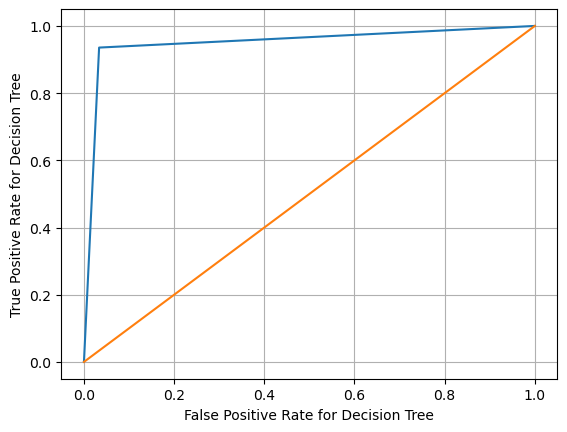



 The AUC for Decision Tree is : 0.950959726601542


 The time to run the Decision Tree model is 0.48669862747192383  seconds


In [21]:
#Run the Decision Tree with the obtained paramters to get the predicted model

t_start=time.time()

model = DecisionTreeClassifier(max_depth=15) #Run the Decision Tree for the paramters {'max_depth': 15}
model.fit(train_df, ytrain)
y_pred = model.predict(test_df)
print(classification_report(ytest, y_pred))

fpr, tpr, _ = roc_curve(ytest,  y_pred)
auc = roc_auc_score(ytest, y_pred)
plt.pyplot.figure()
#create ROC curve
plt.pyplot.plot(fpr,tpr)
line = np.linspace(0,1,100)
plt.pyplot.plot(line,line)
plt.pyplot.ylabel('True Positive Rate for Decision Tree')
plt.pyplot.xlabel('False Positive Rate for Decision Tree')
plt.pyplot.grid()
plt.pyplot.show() 

print("\n\n The AUC for Decision Tree is :", auc)
print("\n\n The time to run the Decision Tree model is", time.time()-t_start, " seconds")

Following this, we tried to use ***Random Forest*** with ***Cross Validation***

In [66]:
#Random Forest with Cross Validation to get the optimum model arguments
random.seed(123)
params = {
    'max_depth' : [3,5,10,15,20,30],
    'n_estimators': [25,100,150]
}
grid2 = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, scoring='f1',verbose=3)
grid2.fit(train_df,ytrain)
grid2.best_params_ 
#{'max_depth': 10, 'n_estimators': 100}

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END ......max_depth=3, n_estimators=25;, score=0.866 total time=   0.5s
[CV 2/5] END ......max_depth=3, n_estimators=25;, score=0.861 total time=   0.5s
[CV 3/5] END ......max_depth=3, n_estimators=25;, score=0.860 total time=   0.5s
[CV 4/5] END ......max_depth=3, n_estimators=25;, score=0.875 total time=   0.5s
[CV 5/5] END ......max_depth=3, n_estimators=25;, score=0.865 total time=   0.5s
[CV 1/5] END .....max_depth=3, n_estimators=100;, score=0.866 total time=   2.1s
[CV 2/5] END .....max_depth=3, n_estimators=100;, score=0.871 total time=   2.2s
[CV 3/5] END .....max_depth=3, n_estimators=100;, score=0.871 total time=   2.0s
[CV 4/5] END .....max_depth=3, n_estimators=100;, score=0.874 total time=   2.1s
[CV 5/5] END .....max_depth=3, n_estimators=100;, score=0.874 total time=   2.1s
[CV 1/5] END .....max_depth=3, n_estimators=150;, score=0.874 total time=   3.2s
[CV 2/5] END .....max_depth=3, n_estimators=150;

{'max_depth': 30, 'n_estimators': 150}

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14573
           1       0.97      0.94      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976
 




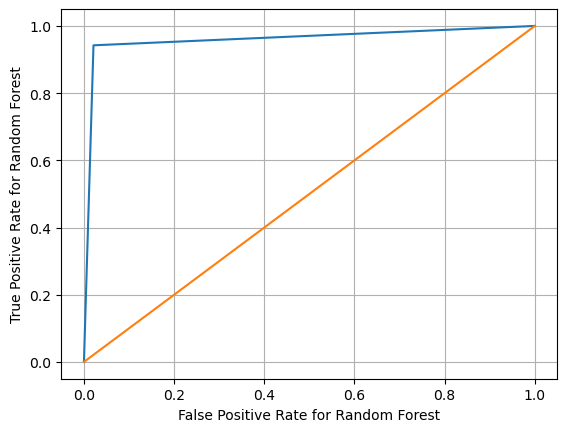



 The AUC for Random Forest is : 0.960580455703693


 The time to run the Random Forest model is 13.461174726486206  seconds


In [27]:
#Run Random Forest with the obtained paramters to get the predicted model

t_start=time.time()

model = RandomForestClassifier(max_depth=30, n_estimators=150) #Run the Random Forest model for the parameters {'max_depth': 30, 'n_estimators': 150}
model.fit(train_df, ytrain)
y_pred = model.predict(test_df)
print(classification_report(ytest, y_pred),"\n\n")

fpr, tpr, _ = roc_curve(ytest,  y_pred)
auc = roc_auc_score(ytest, y_pred)
plt.pyplot.figure()
#create ROC curve
plt.pyplot.plot(fpr,tpr)
line = np.linspace(0,1,100)
plt.pyplot.plot(line,line)
plt.pyplot.ylabel('True Positive Rate for Random Forest')
plt.pyplot.xlabel('False Positive Rate for Random Forest')
plt.pyplot.grid()
plt.pyplot.show() 

print("\n\n The AUC for Random Forest is :", auc)
print("\n\n The time to run the Random Forest model is", time.time()-t_start, " seconds")

We can also find out the importance for each of the metrics. For example, we see that Online Boarding rating has the greatest signifance with respect to customer satisfaction

<Axes: >

<Figure size 2000x500 with 0 Axes>

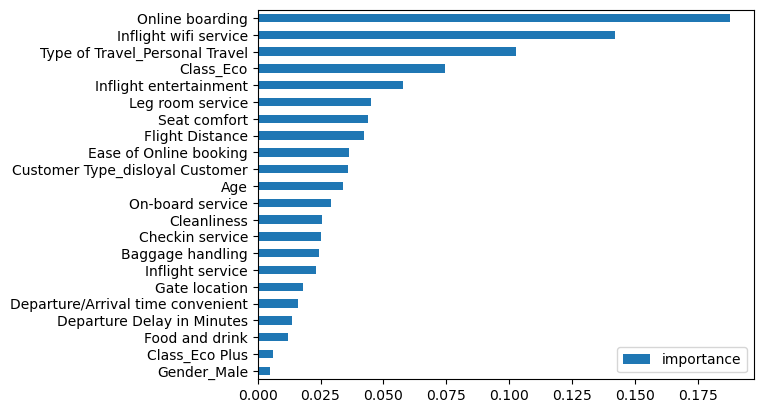

In [52]:
feature_importances = model.feature_importances_
importances = pd.DataFrame({'importance': feature_importances, 'feature': xnames}, 
                           index=xnames).sort_values(by='importance', ascending=False)
plt.pyplot.figure(figsize=(20,5))
importances.head()
importances.sort_values(by='importance', ascending=True).plot(kind='barh')

Following this, we try ***Gradient Boosting*** with ***Cross Validation***

In [123]:
#Gradient Boosting with Cross Validation to get the optimum model arguments

random.seed(123)
params = {
    'n_estimators': [100,200,300],
    'learning_rate' : [0.01,0.05,0.1],
    'max_depth' : [4,6,8]
}
grid2 = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=params, scoring='f1',verbose=3)
grid2.fit(train_df,ytrain)
grid2.best_params_ 
#(0.5,200)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END learning_rate=0.01, max_depth=4, n_estimators=100;, score=0.893 total time=  19.1s
[CV 2/5] END learning_rate=0.01, max_depth=4, n_estimators=100;, score=0.895 total time=  18.3s
[CV 3/5] END learning_rate=0.01, max_depth=4, n_estimators=100;, score=0.893 total time=  18.1s
[CV 4/5] END learning_rate=0.01, max_depth=4, n_estimators=100;, score=0.899 total time=  18.5s
[CV 5/5] END learning_rate=0.01, max_depth=4, n_estimators=100;, score=0.896 total time=  19.9s
[CV 1/5] END learning_rate=0.01, max_depth=4, n_estimators=200;, score=0.900 total time=  40.0s
[CV 2/5] END learning_rate=0.01, max_depth=4, n_estimators=200;, score=0.902 total time=  38.0s
[CV 3/5] END learning_rate=0.01, max_depth=4, n_estimators=200;, score=0.899 total time=  39.1s
[CV 4/5] END learning_rate=0.01, max_depth=4, n_estimators=200;, score=0.905 total time=  40.0s
[CV 5/5] END learning_rate=0.01, max_depth=4, n_estimators=200;, score=0.9

{'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 300}

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14573
           1       0.97      0.95      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.97      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



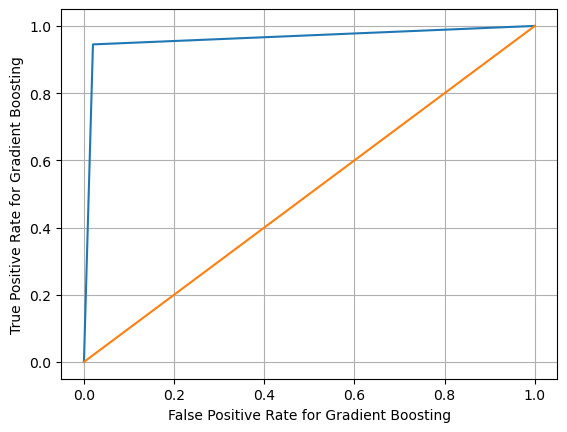



 The AUC for Gradient Boosting is : 0.9625230175498533


 The time to run the Gradient Boosting model is 91.39216566085815  seconds


In [54]:
#Run Gradient Boosting with the obtained paramters to get the predicted model

t_start=time.time()

random.seed(123)
model = GradientBoostingClassifier(max_depth=8,learning_rate=0.05,n_estimators=300) #Running the model using the parameter {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 300}
model.fit(train_df,ytrain)
y_pred = model.predict(test_df)
print(classification_report(ytest, y_pred))

fpr, tpr, _ = roc_curve(ytest,  y_pred)
auc = roc_auc_score(ytest, y_pred)
plt.pyplot.figure()
#create ROC curve
plt.pyplot.plot(fpr,tpr)
line = np.linspace(0,1,100)
plt.pyplot.plot(line,line)
plt.pyplot.ylabel('True Positive Rate for Gradient Boosting')
plt.pyplot.xlabel('False Positive Rate for Gradient Boosting')
plt.pyplot.grid()
plt.pyplot.show() 

print("\n\n The AUC for Gradient Boosting is :", auc)
print("\n\n The time to run the Gradient Boosting model is", time.time()-t_start, " seconds")